In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

%matplotlib inline

import os

In [58]:
#Load Pickles
review1_df = pd.read_pickle('./review1_df.pkl')
business_df = pd.read_pickle('./business_df.pkl')
user_df = pd.read_pickle('./user_df.pkl')

In [67]:
user_df.iloc[2]

average_stars                         4
friends                            None
name                               Andy
review_count                          1
useful                                0
user_id          QPT4Ud4H5sJVr68yXhoWFw
Name: 2, dtype: object

In [59]:
user_df2 = user_df.iloc[:100000]

In [141]:
Gfriends = nx.Graph()

In [142]:
with_friends = {}
for row in user_df2.itertuples(index=True):
    u,fs = (row.user_id,row.friends)
    if fs == 'None': 
        Gfriends.add_node(u)
        continue
    with_friends[u] = {'average_stars':row.average_stars, 'review_count':row.review_count}
    for f in fs.split(', '):
        Gfriends.add_edge(u,fs)

(array([1.29998e+05, 2.14000e+02, 2.50000e+01, 7.00000e+00, 3.00000e+00,
        4.00000e+00, 2.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

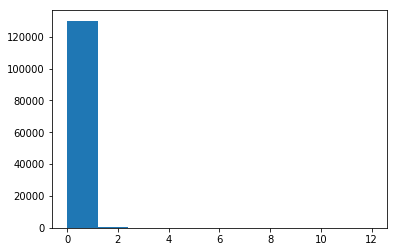

In [74]:
plt.hist([Gfriends.degree(n) for n in Gfriends.nodes])

In [75]:
print('The maximum degree is: %d' % max([i[1] for i in Gfriends.degree]))
print('The minimum degree is: %d' % min([i[1] for i in Gfriends.degree]))

The maximum degree is: 12
The minimum degree is: 0


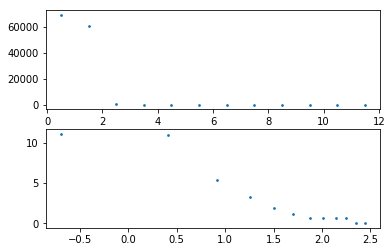

In [76]:
hist, bin_edges = np.histogram([i[1] for i in Gfriends.degree], bins=12)
middle_edges = [(bin_edges[i] + bin_edges[i-1])/2 for i in range(1,len(bin_edges))]
plt.subplot(2,1,1)
plt.scatter(middle_edges, hist, s=3)
plt.subplot(2,1,2)
plt.scatter(np.log(middle_edges), np.log(hist),s=3)

In [79]:
#Friendship Paradox
diffs = []
for usr in with_friends.keys():
    diffs.append(Gfriends.degree(usr) - np.mean([Gfriends.degree(f) for f in Gfriends.adj[usr]]))
print(len([i for i in diffs if i < 0]))

0.9981401722787784


(array([6.0000e+00, 4.0000e+00, 9.0000e+00, 2.4000e+01, 3.2000e+01,
        1.3980e+03, 1.1980e+03, 4.4920e+03, 1.1316e+04, 1.2169e+04]),
 array([-4. , -3.1, -2.2, -1.3, -0.4,  0.5,  1.4,  2.3,  3.2,  4.1,  5. ]),
 <a list of 10 Patch objects>)

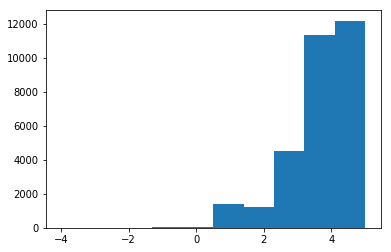

In [170]:
#Rating Paradox?
diffs = []
for usr in with_friends.keys():
    diffs.append(with_friends[usr]['average_stars'] - np.mean([
                 with_friends[f]['average_stars'] if f in with_friends.keys() else 0 for f in Gfriends.adj[usr]]))
print(len([i for i in diffs if i > 0]) / len(diffs))
plt.hist(diffs)

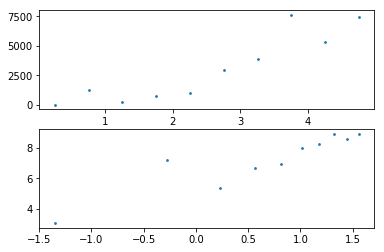

In [173]:
hist, bin_edges = np.histogram([i for i in diffs if i > 0])
middle_edges = [(bin_edges[i] + bin_edges[i-1])/2 for i in range(1,len(bin_edges))]
plt.subplot(2,1,1)
plt.scatter(middle_edges, hist, s=3)
plt.subplot(2,1,2)
plt.scatter(np.log(middle_edges), np.log(hist),s=3)

0.9970308013573479


<function matplotlib.pyplot.show>

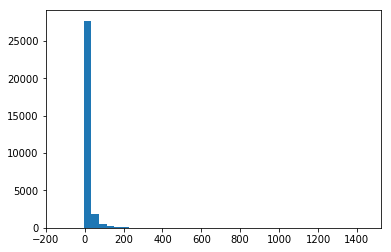

In [176]:
#Reviewing Paradox?
diffs = []
for usr in with_friends.keys():
    diffs.append(with_friends[usr]['review_count'] - np.mean([
                 with_friends[f]['review_count'] if f in with_friends.keys() else 0 for f in Gfriends.adj[usr]]))
print(len([i for i in diffs if i >0]) / len(diffs))
plt.hist(diffs,bins=40)
plt.show

C:\Users\Ronan Perry\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


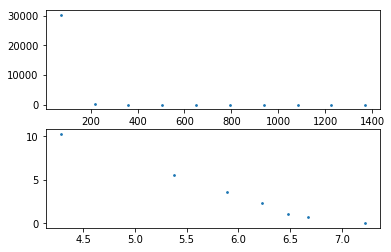

In [177]:
hist, bin_edges = np.histogram([i for i in diffs if i > 0])
middle_edges = [(bin_edges[i] + bin_edges[i-1])/2 for i in range(1,len(bin_edges))]
plt.subplot(2,1,1)
plt.scatter(middle_edges, hist, s=3)
plt.subplot(2,1,2)
plt.scatter(np.log(middle_edges), np.log(hist),s=3)

In [193]:
wf = []
wof = []
for row in user_df2.itertuples(index=True):
    if row.friends == 'None':
        wof.append(row.review_count)
    else:
        wf.append(row.review_count)

C:\Users\Ronan Perry\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Ronan Perry\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


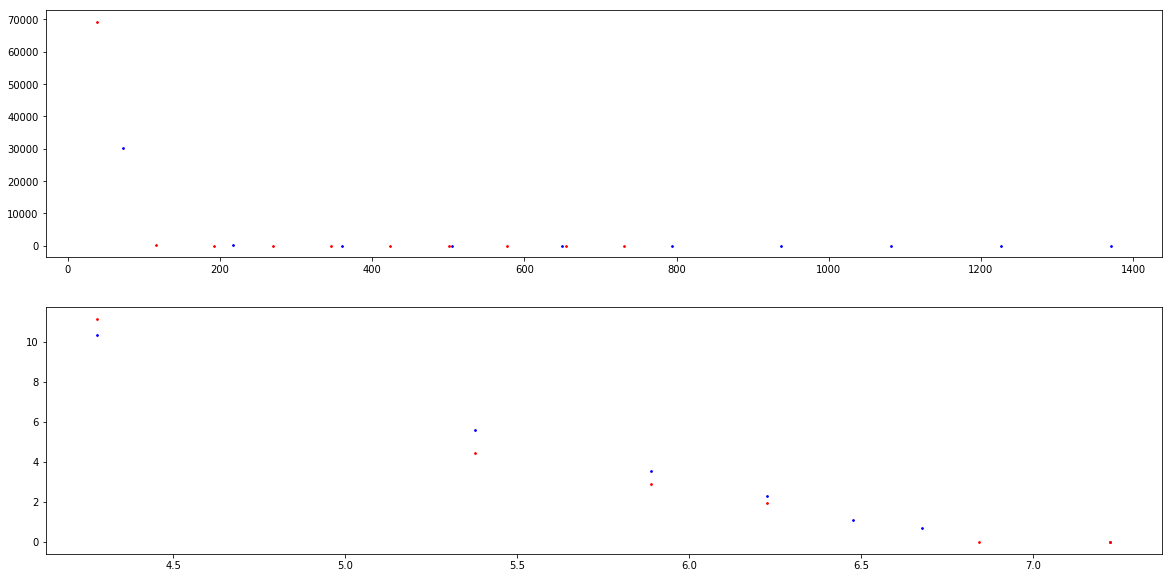

In [194]:
plt.figure(figsize=(20,10))
hist1, bin_edges1 = np.histogram(wf)
hist2, bin_edges2 = np.histogram(wof)
middle_edges1 = [(bin_edges1[i] + bin_edges1[i-1])/2 for i in range(1,len(bin_edges1))]
middle_edges2 = [(bin_edges2[i] + bin_edges2[i-1])/2 for i in range(1,len(bin_edges2))]

plt.subplot(2,1,1)
plt.scatter(middle_edges1, hist1, s=3,c='blue')
plt.scatter(middle_edges2, hist2, s=3,c='red')
plt.subplot(2,1,2)
plt.scatter(np.log(middle_edges1), np.log(hist1),s=3,c='blue')
plt.scatter(np.log(middle_edges1), np.log(hist2),s=3,c='red')